In [378]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5ff17c6f54fd23191499c7017d6366538fcc35b61d0225390f78827c662577ddcc8d5d64ddf58c68c56d6ad68e5721930a5b7a5803b0bee173'

In [379]:
import aocd
from aocd.models import Puzzle
day = 17
year = 2023
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [380]:
from heapq import heappush, heappop
import numpy as np
from functools import cache
import matplotlib.pyplot as plt

In [381]:
test_data = """2413432311323
3215453535623
3255245654254
3446585845452
4546657867536
1438598798454
4457876987766
3637877979653
4654967986887
4564679986453
1224686865563
2546548887735
4322674655533
"""
data_test = test_data.splitlines()

In [382]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(141,
 ['233244231122553122525413454522354135462222326535344662264544223642652255336664663346353252645466356456462435622214553413332454432211214411143',
  '223141234553125225554452413445222253233246635553325226333542552424263422323666243555565625352563233242463262245343212134422111434232123132432',
  '222211241414332422353143154123232224435622425635432542244626326352546424262544336555243322432452265334323634435625353134233211423335325223333',
  '322232223424242153454434322156223244543255665445556362542353232362553242363465623353356322354425466433346323664633124432225444231511234544333',
  '332334545315334114453243332464466364433664255323465255433565444463354334373422362334624463322442462434232264664443442124112355243442414251234',
  '133242121141341224224443146434432622365634323533462456343364634763756335446443456442433652326466222624526234652633644454443153343412234115322',
  '2421112321121242424124434652345542634552364255362354346547567533443764537344664554356544436636362345354235332

In [383]:
        # if pos in seen:
        #     min_cost, min_repeat = seen[pos]
        #     if cost > min_cost: # and repeat >= min_repeat:
        #         continue
        #     if cost <= min_cost and repeat <= min_repeat:
        #         seen[pos] = (cost, repeat)
        # else:
        #     seen[pos] = (cost, repeat)

In [742]:
def parse(data):
    lava = []
    for line in data:
        tmp = []
        for c in line:
            tmp.append(int(c))
        lava.append(tmp)
    return np.array(lava)

def m_dist(lava, pos):
    pass

def manhatten(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# def add_dir(pos, direction):
#     x, y = pos
#     return (int(x + direction.real), int(y + direction.imag))

def add_dir(pos, direction):
    x, y = pos
    return (int(x + direction[0]), int(y + direction[1]))


def check_bounds(pos, shape):
    x, y = pos
    mX, mY = shape
    if x>=0 and x<mX and y>=0 and y < mY:
        return True
    return False
    
def rotate(direction, right=True):
    x, y = direction
    tmp = x + y*1j
    if right:
        tmp *= -1j
    else:
        tmp *= 1j
    return (int(tmp.real), int(tmp.imag))
    

def get_nbrs(pos, cdir, repeat, shape):
    if repeat < 3:
        new_pos = add_dir(pos, cdir)
        if check_bounds(new_pos, shape):
            yield new_pos, cdir, repeat+1
            
    new_dir = rotate(cdir, True)
    new_pos = add_dir(pos, new_dir)
    if check_bounds(new_pos, shape):
        yield new_pos, new_dir, 1

    new_dir = rotate(cdir, False)
    new_pos = add_dir(pos, new_dir)
    if check_bounds(new_pos, shape):
        yield new_pos, new_dir, 1
    
    

def astar(lava):
    stack = []
    heappush(stack, (1e6, 0, (0, 0), 0, (1, 0), []))
    seen = {}
    target = (lava.shape[0]-1, lava.shape[1]-1)
    while len(stack):
        mdist, cost, pos, repeat, cdir, path = heappop(stack)
        if pos in seen:
            min_cost, min_repeat = seen[pos]
            if cost > min_cost: # and repeat >= min_repeat:
                continue
            if cost <= min_cost and repeat <= min_repeat:
                seen[pos] = (cost, repeat)
        else:
            seen[pos] = (cost, repeat)
        if pos == target:
            return cost, path
        for nbr, ndir, nrepeat in get_nbrs(pos, cdir, repeat, lava.shape):
            ncost = cost+lava[nbr]
            heappush(stack, (manhatten(nbr, target) + ncost, ncost, nbr, nrepeat, ndir, path))
        if len(stack) > 1000000:
            print('abort')
            # print(stack[-10:])
            return (stack, seen)
        
def dijkstra(lava, nbr_func=get_nbrs):
    dir_dict = {
        (0, 1): 0,
        (1, 0): 1,
        (0, -1): 2,
        (-1, 0): 3,
    }
    char = {
        (0, 1): 'v',
        (1, 0): '>',
        (0, -1): '^',
        (-1, 0): '<',
    }
    stack = []
    heappush(stack, (0, 0, (0, 0), (1, 0), []))
    # seen = {}
    seen = [{} for i in range(4) ]
    distances = {}
    successor = {}    
    target = (lava.shape[0]-1, lava.shape[1]-1)
    # target = (lava.shape[1]-1, lava.shape[0]-1)
    print(target)
    while len(stack):
        cost, repeat, pos, cdir, path = heappop(stack)
        if pos in seen[dir_dict[cdir]]:
            best_cost, best_repeat = seen[dir_dict[cdir]].get(pos)
            if best_cost <= cost and best_repeat <= repeat:
                continue
            if cost <= best_cost and repeat <= best_repeat:
                seen[dir_dict[cdir]][pos] = (cost, repeat)
        else:
            seen[dir_dict[cdir]][pos] = (cost, repeat)

        if pos == target:
            # if repeat >=4:
            return cost, seen, path
        
        for nbr, ndir, nrepeat in nbr_func(pos, cdir, repeat, lava.shape):
            ncost = cost+lava[nbr]
            best_cost, best_repeat = seen[dir_dict[ndir]].get(nbr, (1e6, 4))
            if best_cost > ncost and best_repeat >= nrepeat:
                # successor[nbr] = pos
                heappush(stack, (ncost, nrepeat, nbr, ndir, path + [char[ndir]]))
            elif best_cost > ncost + 24 and best_repeat > nrepeat:
                heappush(stack, (ncost, nrepeat, nbr, ndir, path + [char[ndir]]))
            
        if len(stack) > 1000000:
            print('abort')
            # print(stack[-10:])
            return (stack, seen)
    print('no path found')    
        
        
        

In [746]:
# lava = parse(data_test)
lava = parse(data)

In [747]:
cost, seen, path = dijkstra(lava.T)

(140, 140)


In [748]:
cost

1039

In [749]:
"".join(path)

'v>>>v>>>v>vv>>v>>>^>>>^>v>>>v>>>^>>^>>^>^>>>^>>>v>>>^>>>^>>>v>^>>>v>>>v>>^>>v>>>^>>>^>>>v>>>^>>>v>>>v>>>v>v>>>^>>v>>>^>^>>>v>>>v>>>^>v>>v>>vv>v>>v>>>v>>vv>>v>v>v>>>v>>>v>vvv>vvv>>>v>>>v>vv>v>vv>>v>>v>v>vvv>vvv>vvv<vvv>vv>vvv>vvv>vvv<vvv>vvv>v<vvv>vvv<vvv>vvv<vvv>vvv<vvv>vvv>vvv<v<vv<vv>vvv<vvv<vvv<vvv>vvv>vvv<vvv>vv>v<vv<vvv<vvv>v>vvv>vv<vv>>vvv>vv'

In [750]:
path_a = path

In [244]:
puzzle.answer_a = int(cost)

In [390]:
# Path 2

In [458]:
test_data2 = """111111111111
999999999991
999999999991
999999999991
999999999991
"""
data_test2 = test_data2.splitlines()

In [781]:
from collections import defaultdict
def get_nbrs_b(pos, cdir, repeat, shape):
    # if repeat >=7:
    #     print('!')
    # print(repeat)
    if repeat < 10:
        new_pos = add_dir(pos, cdir)
        if check_bounds(new_pos, shape):
            yield new_pos, cdir, repeat+1
            
    if repeat >= 4 or repeat == 0:
        new_dir = rotate(cdir, True)
        new_pos = add_dir(pos, new_dir)
        if check_bounds(new_pos, shape):
            yield new_pos, new_dir, 1

        new_dir = rotate(cdir, False)
        new_pos = add_dir(pos, new_dir)
        if check_bounds(new_pos, shape):
            yield new_pos, new_dir, 1
            
def dijkstra_b(lava, nbr_func=get_nbrs):
    dir_dict = {
        (0, 1): 0,
        (1, 0): 1,
        (0, -1): 2,
        (-1, 0): 3,
    }
    char = {
        (0, 1): 'v',
        (1, 0): '>',
        (0, -1): '^',
        (-1, 0): '<',
    }
    stack = []
    results = []
    heappush(stack, (0, 0, (0, 0), (1, 0), []))
    # seen = {}
    # seen = [{} for i in range(4) ]
    seen = defaultdict(dict)
    target = (lava.shape[0]-1, lava.shape[1]-1)
    # target = (lava.shape[1]-1, lava.shape[0]-1)
    print(target)
    while len(stack):
        debug = False
        cost, repeat, pos, cdir, path = heappop(stack)
            
        if pos in seen[(pos, cdir, repeat)]:
            best_cost, best_repeat = seen[(pos, cdir, repeat)].get(pos)
            if best_cost <= cost:
                continue
            elif best_cost > cost:
                seen[(pos, cdir, repeat)][pos] = (cost, repeat)
        else:
            seen[(pos, cdir, repeat)][pos] = (cost, repeat)

        if pos == target:
            if repeat >= 1:
                heappush(results, (cost, seen, path))
                return cost, seen, path
            else:
                continue
        
        for nbr, ndir, nrepeat in nbr_func(pos, cdir, repeat, lava.shape):
            if nrepeat == 1:
                chk_x = nbr[0] + ndir[0] * 3
                chk_y = nbr[1] + ndir[1] * 3
                if not check_bounds((chk_x, chk_y), lava.shape):
                    continue
            if debug:
                print(nbr, ndir, nrepeat)

            ncost = cost+lava[nbr]
            # best_cost, best_repeat = seen[dir_dict[ndir]].get(nbr, (1e6, 99))
            # if best_cost + 24> ncost:
                # successor[nbr] = pos
            heappush(stack, (ncost, nrepeat, nbr, ndir, path + [char[ndir]]))
            if debug:
                print(stack[:2])
            
        if len(stack) > 1000000:
            print('abort')
            # print(stack[-10:])
            return (stack, seen)
    return results

In [782]:
# lava = parse(data_test)
# lava = parse(data_test2)
lava = parse(data)

In [783]:
cost, seen, path = dijkstra_b(lava.T, nbr_func=get_nbrs_b)    
# results = dijkstra_b(lava.T, nbr_func=get_nbrs_b)

(140, 140)


In [784]:
cost

1201

In [785]:
puzzle.answer_b = int(cost)

That's the right answer!  You are one gold star closer to restoring snow operations.You have completed Day 17! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [691]:
# too high 1255

In [789]:
"".join(path)

'vvvvv>>>>>>>>>>vvvv>>>>>>>^^^^>>>>>>>>>>^^^^>>>>>>>>>>vvvv>>>>>>>>>^^^^>>>>>>>>>>vvvv>>>>>>>>>^^^^>>>>>>>>>vvvvv>>>>>>>>>>^^^^>>>>>>>>>>vvvv>>>>>>>>>>vvvv>>>>>vvvvv>>>>>>>>>>vvvvvvvvv>>>>vvvv>>>>vvvvvvvvvv>>>>vvvvvvvvvv>>>>vvvvvvvvv>>>>vvvvvvvvvv<<<<vvvvvvvv>>>>>vvvvvvvvv<<<<vvvvvvvvvv>>>>vvvvvvvvvv<<<<vvvvvvv>>>>vvvvvvvvvv<<<<vvvvvvvvvv>>>>vvvvvvvvv'

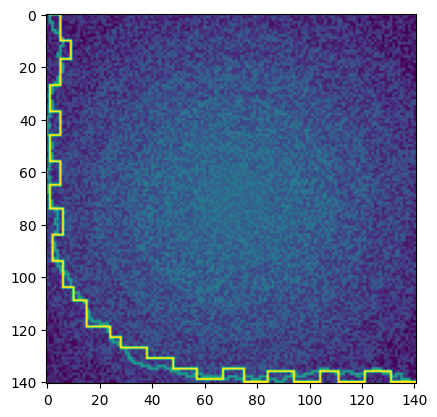

In [788]:
vis = lava.T.copy()
x = y = 0
char = {
    'v': (0, 1),
    '>': (1, 0),
    '^': (0, -1),
    '<': (-1, 0),
}

for p in path_a:
    a, b = char[p]
    x += a
    y += b
    vis[x, y] = 12

x = y = 0
for p in path:
    a, b = char[p]
    x += a
    y += b
    vis[x, y] = 21
    
plt.imshow(vis)

In [792]:
## https://www.reddit.com/r/adventofcode/comments/18k9ne5/comment/kdq86mr/?utm_source=share&utm_medium=web2x&context=3
import heapq
def minimal_heat(start, end, least, most):
    queue = [(0, *start, 0,0)]
    seen = set()
    while queue:
        heat,x,y,px,py = heapq.heappop(queue)
        if (x,y) == end: return heat
        if (x,y, px,py) in seen: continue
        seen.add((x,y, px,py))
        # calculate turns only
        for dx,dy in {(1,0),(0,1),(-1,0),(0,-1)}-{(px,py),(-px,-py)}:
            a,b,h = x,y,heat
            # enter 4-10 moves in the chosen direction
            for i in range(1,most+1):
                a,b=a+dx,b+dy
                if (a,b) in board:
                    h += board[a,b]
                    if i>=least:
                        heapq.heappush(queue, (h, a,b, dx,dy))

board = {(i,j): int(c) for i,r in enumerate(open("./data/input_17")) for j,c in enumerate(r.strip())}
print(minimal_heat((0,0),max(board), 1, 3))
print(minimal_heat((0,0),max(board), 4, 10))

1039
1201


In [794]:
type({(1,0),(0,1),(-1,0),(0,-1)})

set

In [795]:
set([1,2,3]) - set([2])

{1, 3}

In [799]:
-1j/1j

(-1+0j)